In [1]:
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import json
import pandas as pd

In [1]:
N = 40
fname = "log_5 {'alpha': [0.1, 0.35], 'mu': [0.02, 0.02], 'gamma': [0.05, 0.02], 'lambda': [0.03, 0.04], 'kappa': [0.04, 0.05]}.txt"


In [14]:
a = (5.62-0.69) /3
0.69 + 2*a

b = (10 - 0.75)/3
0.75 + 2*b

[b*4,a*4]

[12.333333333333334, 6.573333333333333]

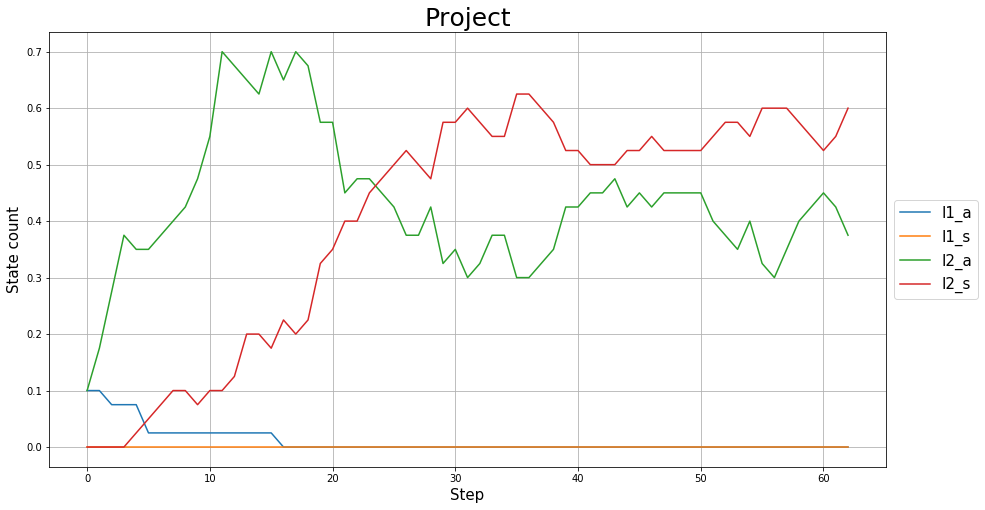

In [100]:
fname = 'log.txt'
file = open(fname, "r")
lines = file.readlines()
ls = list()
states = ["S_a", "S_s", "I1_a", "I2_a", "I1_s", "I2_s"]
steps = 0
for line in lines:
#     dct = literal_eval(line[40:]) 
    dct = json.loads('{'+ line.split('{')[-1])
    ls.append(dct)
    steps = max(steps, dct["step"])
occurences = dict()
for step in range(steps+1):
    for state in states:
        occurences[(step, state)] = len(list(filter(lambda occ: occ["step"] == step and occ["state"] == state, ls)))
S_a = np.zeros(steps+1)
S_s = np.zeros(steps+1)
I1_a = np.zeros(steps+1)
I1_s = np.zeros(steps+1)
I2_a = np.zeros(steps+1)
I2_s = np.zeros(steps+1)

for i in range(steps+1):
    S_a[i] = occurences[(i, "S_a")]
    S_s[i] = occurences[(i, "S_s")]
    I1_a[i] = occurences[(i, "I1_a")]
    I1_s[i] = occurences[(i, "I1_s")]
    I2_a[i] = occurences[(i, "I2_a")]
    I2_s[i] = occurences[(i, "I2_s")]


# export processed data
table = pd.DataFrame([S_a, S_s,I1_a,I1_s,I2_a,I2_s]).T
table.to_csv(fname+'_p.csv', header=None, index=None)

plt.figure(figsize=(15, 8))
# plt.plot(S_a/N,label='S_a')
# plt.plot(S_s/N,label='S_s')
plt.plot(I1_a/N,label='I1_a')
plt.plot(I1_s/N,label='I1_s')
plt.plot(I2_a/N,label='I2_a')
plt.plot(I2_s/N,label='I2_s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.grid()
plt.title("Project",  fontsize=25)
plt.xlabel("Step",  fontsize=15)
plt.ylabel("State count",  fontsize=15)
plt.show()

file.close()

In [23]:
table = pd.DataFrame([S_a, S_s,I1_a,I1_s,I2_a,I2_s]).T
table.to_csv(fname+'_p.csv', header=None, index=None)

(237, 6)
(220, 6)
(231, 6)
(284, 6)
(1166, 6)


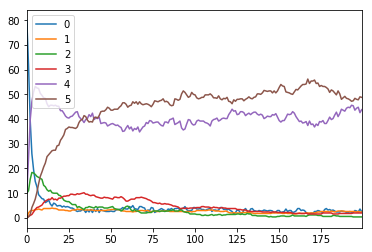

In [93]:
param = "{'alpha': [0.1, 0.35], 'mu': [0.02, 0.02], 'gamma': [0.05, 0.02], 'lambda': [0.03, 0.04], 'kappa': [0.04, 0.05]}"
template = "log_{} {}.txt_p.csv"

template.format(1, param)
df_list = []
for i in range(1,6):
    df = pd.read_csv(template.format(i, param), header=None)
    print(df.shape)
    df_list.append(df[0:200])

df = pd.DataFrame(np.zeros([200,6]))
for df_ in df_list:
    df += df_
average = df/5
average.plot()
average.to_csv('average.csv', header=None, index=None)